In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import os
# Product name
P_name = "Bitter gourd"

# past = lookback
past = 5
# dat = predict future day
day = 7

#LSTM unit
LSTM_unit = 10

# 選擇train/test 切割日期
train_date = "2020-06-01"
test_date = "2020-06-01"

# 選擇 train start 日期
# choice_date = False
choice_date = True
start_date = "2010-01-01"

# 選擇是否需要天氣
choice_w = False
# choice_w = True

# 驗證資料切割%數
val_split = 0.15

# 選擇是否加入 price/volums diff value data
# diff_value = False
diff_value = True

In [2]:
if os.path.isfile("model_dateset_苦瓜.xlsx") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/Yi-Wei-Lin/dataset/model_dateset_苦瓜.xlsx"

if os.path.isfile("reportdaily_mean_fillna.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv"

if os.path.isfile("TyphoonDatabase.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv"

--2021-07-31 03:49:26--  https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/Yi-Wei-Lin/dataset/model_dateset_%E8%8B%A6%E7%93%9C.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Yi-Wei-Lin/Tibame_AI_Project/main/userdata/Yi-Wei-Lin/dataset/model_dateset_%E8%8B%A6%E7%93%9C.xlsx [following]
--2021-07-31 03:49:27--  https://raw.githubusercontent.com/Yi-Wei-Lin/Tibame_AI_Project/main/userdata/Yi-Wei-Lin/dataset/model_dateset_%E8%8B%A6%E7%93%9C.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2597595 (2.5M) [application/octet-stream]
Saving to: ‘model_dateset_苦瓜.xlsx’

model_dat

In [3]:
city = {
    '基隆市':'KLU',
    '臺北市':'TPE',
    '新北市':'TPH',
    '桃園市':'TYC',
    '新竹市':'HSC',
    '新竹縣':'HSH',
    '苗栗縣':'MAL',
    '臺中市':'TXG',
    '彰化縣':'CWH',
    '南投縣':'NTO',
    '雲林縣':'YLH',
    '嘉義市':'CYI',
    '嘉義縣':'CHY',
    '臺南市':'TNN',
    '高雄市':'KHH',
    '屏東縣':'IUH',
    '宜蘭縣':'ILN',
    '花蓮縣':'HWA',
    '臺東縣':'TTT'
}
df = pd.read_csv('reportdaily_mean_fillna.csv', encoding='utf-8')
# 使用index做merge
df_date = df['date'].drop_duplicates().to_frame().set_index('date')

for cityname, citycode in city.items():
    df_city = df.loc[df['city'] == cityname].add_suffix('_' + citycode).set_index('date' + '_' + citycode)
    df_date = pd.merge(df_date, df_city, how='left', left_index = True, right_index = True)

df_date.to_csv('all.csv', encoding='utf-8')
typhoon_df = pd.read_csv('TyphoonDatabase.csv', encoding='utf-8')
weather_df = pd.read_csv('all.csv', encoding='utf-8')
weather_df['WarnMark'] = 0
# 警報日期處理
import datetime

period_ctrl = 0 # 颱風警報期間控制
warn_mark = list()

for wd in typhoon_df['Warning']:
  start = datetime.datetime.strptime(wd[0:10], '%Y-%m-%d')
  end = datetime.datetime.strptime(wd[17:27], '%Y-%m-%d')
  period = end - start
  # print(period.days)
  
  ctrl_start = start
  i = 0
  
  warn_mark.append(wd[0:10])
  while i < period.days:
    start = start + datetime.timedelta(days=1)
    warn_mark.append(datetime.datetime.strftime(start, '%Y-%m-%d'))
    i = i + 1
  warn_mark.append(wd[17:27])

  if period_ctrl != 0:
    j = 0
    while j < period_ctrl:
      ctrl_start = ctrl_start - datetime.timedelta(days=1)
      warn_mark.append(datetime.datetime.strftime(ctrl_start, '%Y-%m-%d'))
      j = j + 1

unique_set = set(warn_mark)
unique_list = list(unique_set)
warn_mark = list()
warn_mark = unique_list
import csv

weather_list = weather_df.values.tolist()

with open('dataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  
  writer.writerow(['date','city_KLU','StnPres_KLU','SeaPres_KLU','StnPresMax_KLU','StnPresMaxTime_KLU','StnPresMin_KLU','StnPresMinTime_KLU','Temperature_KLU','TMax_KLU','TMaxTime_KLU','TMin_KLU','TMinTime_KLU','TdDewPoint_KLU','RH_KLU','RHMin_KLU','RHMinTime_KLU','WS_KLU','WD_KLU','WSGust_KLU','WDGust_KLU','WGustTime_KLU','Precp_KLU','PrecpHour_KLU','PrecpMax10_KLU','PrecpMax10Time_KLU','PrecpMax60_KLU','PrecpMax60Time_KLU','SunShine_KLU','SunShineRate_KLU','GloblRad_KLU','VisbMean_KLU','EvapA_KLU','UVIMax_KLU','UVIMaxTime_KLU','CloudAmount_KLU','city_TPE','StnPres_TPE','SeaPres_TPE','StnPresMax_TPE','StnPresMaxTime_TPE','StnPresMin_TPE','StnPresMinTime_TPE','Temperature_TPE','TMax_TPE','TMaxTime_TPE','TMin_TPE','TMinTime_TPE','TdDewPoint_TPE','RH_TPE','RHMin_TPE','RHMinTime_TPE','WS_TPE','WD_TPE','WSGust_TPE','WDGust_TPE','WGustTime_TPE','Precp_TPE','PrecpHour_TPE','PrecpMax10_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','SunShine_TPE','SunShineRate_TPE','GloblRad_TPE','VisbMean_TPE','EvapA_TPE','UVIMax_TPE','UVIMaxTime_TPE','CloudAmount_TPE','city_TPH','StnPres_TPH','SeaPres_TPH','StnPresMax_TPH','StnPresMaxTime_TPH','StnPresMin_TPH','StnPresMinTime_TPH','Temperature_TPH','TMax_TPH','TMaxTime_TPH','TMin_TPH','TMinTime_TPH','TdDewPoint_TPH','RH_TPH','RHMin_TPH','RHMinTime_TPH','WS_TPH','WD_TPH','WSGust_TPH','WDGust_TPH','WGustTime_TPH','Precp_TPH','PrecpHour_TPH','PrecpMax10_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','SunShine_TPH','SunShineRate_TPH','GloblRad_TPH','VisbMean_TPH','EvapA_TPH','UVIMax_TPH','UVIMaxTime_TPH','CloudAmount_TPH','city_TYC','StnPres_TYC','SeaPres_TYC','StnPresMax_TYC','StnPresMaxTime_TYC','StnPresMin_TYC','StnPresMinTime_TYC','Temperature_TYC','TMax_TYC','TMaxTime_TYC','TMin_TYC','TMinTime_TYC','TdDewPoint_TYC','RH_TYC','RHMin_TYC','RHMinTime_TYC','WS_TYC','WD_TYC','WSGust_TYC','WDGust_TYC','WGustTime_TYC','Precp_TYC','PrecpHour_TYC','PrecpMax10_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','SunShine_TYC','SunShineRate_TYC','GloblRad_TYC','VisbMean_TYC','EvapA_TYC','UVIMax_TYC','UVIMaxTime_TYC','CloudAmount_TYC','city_HSC','StnPres_HSC','SeaPres_HSC','StnPresMax_HSC','StnPresMaxTime_HSC','StnPresMin_HSC','StnPresMinTime_HSC','Temperature_HSC','TMax_HSC','TMaxTime_HSC','TMin_HSC','TMinTime_HSC','TdDewPoint_HSC','RH_HSC','RHMin_HSC','RHMinTime_HSC','WS_HSC','WD_HSC','WSGust_HSC','WDGust_HSC','WGustTime_HSC','Precp_HSC','PrecpHour_HSC','PrecpMax10_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','SunShine_HSC','SunShineRate_HSC','GloblRad_HSC','VisbMean_HSC','EvapA_HSC','UVIMax_HSC','UVIMaxTime_HSC','CloudAmount_HSC','city_HSH','StnPres_HSH','SeaPres_HSH','StnPresMax_HSH','StnPresMaxTime_HSH','StnPresMin_HSH','StnPresMinTime_HSH','Temperature_HSH','TMax_HSH','TMaxTime_HSH','TMin_HSH','TMinTime_HSH','TdDewPoint_HSH','RH_HSH','RHMin_HSH','RHMinTime_HSH','WS_HSH','WD_HSH','WSGust_HSH','WDGust_HSH','WGustTime_HSH','Precp_HSH','PrecpHour_HSH','PrecpMax10_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','SunShine_HSH','SunShineRate_HSH','GloblRad_HSH','VisbMean_HSH','EvapA_HSH','UVIMax_HSH','UVIMaxTime_HSH','CloudAmount_HSH','city_MAL','StnPres_MAL','SeaPres_MAL','StnPresMax_MAL','StnPresMaxTime_MAL','StnPresMin_MAL','StnPresMinTime_MAL','Temperature_MAL','TMax_MAL','TMaxTime_MAL','TMin_MAL','TMinTime_MAL','TdDewPoint_MAL','RH_MAL','RHMin_MAL','RHMinTime_MAL','WS_MAL','WD_MAL','WSGust_MAL','WDGust_MAL','WGustTime_MAL','Precp_MAL','PrecpHour_MAL','PrecpMax10_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','SunShine_MAL','SunShineRate_MAL','GloblRad_MAL','VisbMean_MAL','EvapA_MAL','UVIMax_MAL','UVIMaxTime_MAL','CloudAmount_MAL','city_TXG','StnPres_TXG','SeaPres_TXG','StnPresMax_TXG','StnPresMaxTime_TXG','StnPresMin_TXG','StnPresMinTime_TXG','Temperature_TXG','TMax_TXG','TMaxTime_TXG','TMin_TXG','TMinTime_TXG','TdDewPoint_TXG','RH_TXG','RHMin_TXG','RHMinTime_TXG','WS_TXG','WD_TXG','WSGust_TXG','WDGust_TXG','WGustTime_TXG','Precp_TXG','PrecpHour_TXG','PrecpMax10_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','SunShine_TXG','SunShineRate_TXG','GloblRad_TXG','VisbMean_TXG','EvapA_TXG','UVIMax_TXG','UVIMaxTime_TXG','CloudAmount_TXG','city_CWH','StnPres_CWH','SeaPres_CWH','StnPresMax_CWH','StnPresMaxTime_CWH','StnPresMin_CWH','StnPresMinTime_CWH','Temperature_CWH','TMax_CWH','TMaxTime_CWH','TMin_CWH','TMinTime_CWH','TdDewPoint_CWH','RH_CWH','RHMin_CWH','RHMinTime_CWH','WS_CWH','WD_CWH','WSGust_CWH','WDGust_CWH','WGustTime_CWH','Precp_CWH','PrecpHour_CWH','PrecpMax10_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','SunShine_CWH','SunShineRate_CWH','GloblRad_CWH','VisbMean_CWH','EvapA_CWH','UVIMax_CWH','UVIMaxTime_CWH','CloudAmount_CWH','city_NTO','StnPres_NTO','SeaPres_NTO','StnPresMax_NTO','StnPresMaxTime_NTO','StnPresMin_NTO','StnPresMinTime_NTO','Temperature_NTO','TMax_NTO','TMaxTime_NTO','TMin_NTO','TMinTime_NTO','TdDewPoint_NTO','RH_NTO','RHMin_NTO','RHMinTime_NTO','WS_NTO','WD_NTO','WSGust_NTO','WDGust_NTO','WGustTime_NTO','Precp_NTO','PrecpHour_NTO','PrecpMax10_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','SunShine_NTO','SunShineRate_NTO','GloblRad_NTO','VisbMean_NTO','EvapA_NTO','UVIMax_NTO','UVIMaxTime_NTO','CloudAmount_NTO','city_YLH','StnPres_YLH','SeaPres_YLH','StnPresMax_YLH','StnPresMaxTime_YLH','StnPresMin_YLH','StnPresMinTime_YLH','Temperature_YLH','TMax_YLH','TMaxTime_YLH','TMin_YLH','TMinTime_YLH','TdDewPoint_YLH','RH_YLH','RHMin_YLH','RHMinTime_YLH','WS_YLH','WD_YLH','WSGust_YLH','WDGust_YLH','WGustTime_YLH','Precp_YLH','PrecpHour_YLH','PrecpMax10_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','SunShine_YLH','SunShineRate_YLH','GloblRad_YLH','VisbMean_YLH','EvapA_YLH','UVIMax_YLH','UVIMaxTime_YLH','CloudAmount_YLH','city_CYI','StnPres_CYI','SeaPres_CYI','StnPresMax_CYI','StnPresMaxTime_CYI','StnPresMin_CYI','StnPresMinTime_CYI','Temperature_CYI','TMax_CYI','TMaxTime_CYI','TMin_CYI','TMinTime_CYI','TdDewPoint_CYI','RH_CYI','RHMin_CYI','RHMinTime_CYI','WS_CYI','WD_CYI','WSGust_CYI','WDGust_CYI','WGustTime_CYI','Precp_CYI','PrecpHour_CYI','PrecpMax10_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','SunShine_CYI','SunShineRate_CYI','GloblRad_CYI','VisbMean_CYI','EvapA_CYI','UVIMax_CYI','UVIMaxTime_CYI','CloudAmount_CYI','city_CHY','StnPres_CHY','SeaPres_CHY','StnPresMax_CHY','StnPresMaxTime_CHY','StnPresMin_CHY','StnPresMinTime_CHY','Temperature_CHY','TMax_CHY','TMaxTime_CHY','TMin_CHY','TMinTime_CHY','TdDewPoint_CHY','RH_CHY','RHMin_CHY','RHMinTime_CHY','WS_CHY','WD_CHY','WSGust_CHY','WDGust_CHY','WGustTime_CHY','Precp_CHY','PrecpHour_CHY','PrecpMax10_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','SunShine_CHY','SunShineRate_CHY','GloblRad_CHY','VisbMean_CHY','EvapA_CHY','UVIMax_CHY','UVIMaxTime_CHY','CloudAmount_CHY','city_TNN','StnPres_TNN','SeaPres_TNN','StnPresMax_TNN','StnPresMaxTime_TNN','StnPresMin_TNN','StnPresMinTime_TNN','Temperature_TNN','TMax_TNN','TMaxTime_TNN','TMin_TNN','TMinTime_TNN','TdDewPoint_TNN','RH_TNN','RHMin_TNN','RHMinTime_TNN','WS_TNN','WD_TNN','WSGust_TNN','WDGust_TNN','WGustTime_TNN','Precp_TNN','PrecpHour_TNN','PrecpMax10_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','SunShine_TNN','SunShineRate_TNN','GloblRad_TNN','VisbMean_TNN','EvapA_TNN','UVIMax_TNN','UVIMaxTime_TNN','CloudAmount_TNN','city_KHH','StnPres_KHH','SeaPres_KHH','StnPresMax_KHH','StnPresMaxTime_KHH','StnPresMin_KHH','StnPresMinTime_KHH','Temperature_KHH','TMax_KHH','TMaxTime_KHH','TMin_KHH','TMinTime_KHH','TdDewPoint_KHH','RH_KHH','RHMin_KHH','RHMinTime_KHH','WS_KHH','WD_KHH','WSGust_KHH','WDGust_KHH','WGustTime_KHH','Precp_KHH','PrecpHour_KHH','PrecpMax10_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','SunShine_KHH','SunShineRate_KHH','GloblRad_KHH','VisbMean_KHH','EvapA_KHH','UVIMax_KHH','UVIMaxTime_KHH','CloudAmount_KHH','city_IUH','StnPres_IUH','SeaPres_IUH','StnPresMax_IUH','StnPresMaxTime_IUH','StnPresMin_IUH','StnPresMinTime_IUH','Temperature_IUH','TMax_IUH','TMaxTime_IUH','TMin_IUH','TMinTime_IUH','TdDewPoint_IUH','RH_IUH','RHMin_IUH','RHMinTime_IUH','WS_IUH','WD_IUH','WSGust_IUH','WDGust_IUH','WGustTime_IUH','Precp_IUH','PrecpHour_IUH','PrecpMax10_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','SunShine_IUH','SunShineRate_IUH','GloblRad_IUH','VisbMean_IUH','EvapA_IUH','UVIMax_IUH','UVIMaxTime_IUH','CloudAmount_IUH','city_ILN','StnPres_ILN','SeaPres_ILN','StnPresMax_ILN','StnPresMaxTime_ILN','StnPresMin_ILN','StnPresMinTime_ILN','Temperature_ILN','TMax_ILN','TMaxTime_ILN','TMin_ILN','TMinTime_ILN','TdDewPoint_ILN','RH_ILN','RHMin_ILN','RHMinTime_ILN','WS_ILN','WD_ILN','WSGust_ILN','WDGust_ILN','WGustTime_ILN','Precp_ILN','PrecpHour_ILN','PrecpMax10_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','SunShine_ILN','SunShineRate_ILN','GloblRad_ILN','VisbMean_ILN','EvapA_ILN','UVIMax_ILN','UVIMaxTime_ILN','CloudAmount_ILN','city_HWA','StnPres_HWA','SeaPres_HWA','StnPresMax_HWA','StnPresMaxTime_HWA','StnPresMin_HWA','StnPresMinTime_HWA','Temperature_HWA','TMax_HWA','TMaxTime_HWA','TMin_HWA','TMinTime_HWA','TdDewPoint_HWA','RH_HWA','RHMin_HWA','RHMinTime_HWA','WS_HWA','WD_HWA','WSGust_HWA','WDGust_HWA','WGustTime_HWA','Precp_HWA','PrecpHour_HWA','PrecpMax10_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','SunShine_HWA','SunShineRate_HWA','GloblRad_HWA','VisbMean_HWA','EvapA_HWA','UVIMax_HWA','UVIMaxTime_HWA','CloudAmount_HWA','city_TTT','StnPres_TTT','SeaPres_TTT','StnPresMax_TTT','StnPresMaxTime_TTT','StnPresMin_TTT','StnPresMinTime_TTT','Temperature_TTT','TMax_TTT','TMaxTime_TTT','TMin_TTT','TMinTime_TTT','TdDewPoint_TTT','RH_TTT','RHMin_TTT','RHMinTime_TTT','WS_TTT','WD_TTT','WSGust_TTT','WDGust_TTT','WGustTime_TTT','Precp_TTT','PrecpHour_TTT','PrecpMax10_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','SunShine_TTT','SunShineRate_TTT','GloblRad_TTT','VisbMean_TTT','EvapA_TTT','UVIMax_TTT','UVIMaxTime_TTT','CloudAmount_TTT','WarnMark'])

  for wl in weather_list:
    f = 0
    for wm in warn_mark:
      if wl[0] == wm:
        wl[666] = 1
        writer.writerow(wl)
        f = 1
    if f == 0:
      writer.writerow(wl)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.read_excel("model_dateset_苦瓜.xlsx")
data_w = pd.read_csv("dataset.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
if diff_value == True:
  data["Avg_price_diff"] = data["Avg_price_diff"].fillna(0)
  data["Volume_diff"] = data["Volume_diff"].fillna(0)
else:
  data = data.drop(["Avg_price_diff"], axis=1)
  data = data.drop(["Volume_diff"], axis=1)

In [6]:
drop_name = ["city_", "StnPresMaxTime_", "StnPresMinTime_", "TMaxTime_", "TMinTime_", "RHMinTime_", "WGustTime_", "PrecpMax10Time_", "PrecpMax60Time_", "UVIMaxTime_"]
city = [
    'KLU',
    'TPE',
    'TPH',
    'TYC',
    'HSC',
    'HSH',
    'MAL',
    'TXG',
    'CWH',
    'NTO',
    'YLH',
    'CYI',
    'CHY',
    'TNN',
    'KHH',
    'IUH',
    'ILN',
    'HWA',
    'TTT'
]
drop = []
for c in city:
  for n in drop_name:
    drop.append(n+c)
data_w = data_w.drop(drop, axis=1).dropna()
data_w = data_w.rename(columns={'date':'Date'})
data_w["Date"] = pd.to_datetime(data_w["Date"])

In [7]:
data = data.dropna()
data = data.loc[data["Market"] == "台北一"]
np.array(data["Avg_price"]).reshape(-1,1)

array([[35.5],
       [31.9],
       [32.7],
       ...,
       [19.6],
       [38.3],
       [43.4]])

In [8]:
if choice_w == True:
  data = pd.merge(data,data_w,how="left", on="Date").dropna()

In [9]:
data = data.reset_index()
data

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month,Week_day,Year,Rest_day
0,7841,2000-01-02,台北一,FG1 苦瓜 白大米,65.0,42.0,15.0,35.5,0.00,17841.0,0.00,1,7,2000,0
1,7842,2000-01-03,台北一,FG1 苦瓜 白大米,70.0,37.0,12.0,31.9,-10.14,15195.0,-14.83,1,1,2000,0
2,7843,2000-01-04,台北一,FG1 苦瓜 白大米,65.0,35.0,10.0,32.7,2.51,10990.0,-27.67,1,2,2000,0
3,7844,2000-01-05,台北一,FG1 苦瓜 白大米,65.0,35.0,10.0,34.4,5.20,9808.0,-10.76,1,3,2000,0
4,7845,2000-01-06,台北一,FG1 苦瓜 白大米,70.0,43.0,12.0,37.4,8.72,10559.0,7.66,1,4,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,15674,2021-06-13,台北一,FG1 苦瓜 白大米,73.8,40.6,19.1,42.9,-18.60,14245.0,32.19,6,7,2021,0
6499,15675,2021-06-14,台北一,FG1 苦瓜 白大米,57.8,25.4,13.4,29.5,-31.24,18156.0,27.46,6,1,2021,0
6500,15678,2021-06-17,台北一,FG1 苦瓜 白大米,38.0,17.7,7.0,19.6,-33.56,22238.0,22.48,6,4,2021,0
6501,15679,2021-06-18,台北一,FG1 苦瓜 白大米,81.9,31.9,14.3,38.3,95.41,9942.0,-55.29,6,5,2021,0


In [10]:
# data_dum = pd.get_dummies(data)
# pd.DataFrame(data_dum)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Month"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Month_")
data = data.join(month, how="left")
# df.loc[df['city'] == '基隆市'].add_suffix('_' + 'KLU')
# df.rename(columns={'舊欄位名稱': '新欄位名稱'}) .add_prefix("Month_")

In [11]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Week_day"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Week_day_")
data = data.join(month, how="left")

In [12]:
# onehotencoder = OneHotEncoder()
# data_str_ohe=onehotencoder.fit_transform(data[["Year"]]).toarray()
# month = pd.DataFrame(data_str_ohe)
# for i in month:
#   new = int(i) + data["Year"].iloc[0]
#   new = str(new)
#   month = month.rename(columns={i:new})
# month = month.add_prefix("Year_")
# data = data.join(month, how="left")

In [13]:
data_train = data[data["Date"] < "2020-06-01"]
if choice_date == True:
  data_train = data_train[data_train["Date"] > start_date]
data_test = data[data["Date"] >= "2020-06-01"]

In [14]:
data[data["Date"] >= "2020-06-01"].head(10)

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month,Week_day,Year,Rest_day,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7
6195,15298,2020-06-02,台北一,FG1 苦瓜 白大米,76.7,49.4,27.6,50.5,4.99,16366.0,20.11,6,2,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6196,15299,2020-06-03,台北一,FG1 苦瓜 白大米,77.2,50.2,30.6,51.6,2.18,10272.0,-37.24,6,3,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6197,15300,2020-06-04,台北一,FG1 苦瓜 白大米,70.5,47.6,29.9,48.7,-5.62,13156.0,28.08,6,4,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6198,15301,2020-06-05,台北一,FG1 苦瓜 白大米,73.0,49.4,31.6,50.5,3.70,10856.0,-17.48,6,5,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6199,15302,2020-06-06,台北一,FG1 苦瓜 白大米,71.8,48.7,34.4,50.5,0.00,13955.0,28.55,6,6,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6200,15303,2020-06-07,台北一,FG1 苦瓜 白大米,65.1,43.7,30.6,45.3,-10.30,18650.0,33.64,6,7,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6201,15305,2020-06-09,台北一,FG1 苦瓜 白大米,59.3,39.3,26.7,40.8,-9.93,24306.0,30.33,6,2,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6202,15306,2020-06-10,台北一,FG1 苦瓜 白大米,57.9,37.0,22.7,38.3,-6.13,14685.0,-39.58,6,3,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6203,15307,2020-06-11,台北一,FG1 苦瓜 白大米,69.4,40.2,25.0,43.0,12.27,11756.0,-19.95,6,4,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6204,15308,2020-06-12,台北一,FG1 苦瓜 白大米,75.5,44.7,28.1,47.5,10.47,9297.0,-20.92,6,5,2020,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
data_train

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month,Week_day,Year,Rest_day,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7
3054,11494,2010-01-02,台北一,FG1 苦瓜 白大米,38.7,29.0,16.8,28.5,-2.73,9744.0,5.44,1,6,2010,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3055,11495,2010-01-03,台北一,FG1 苦瓜 白大米,37.4,29.0,18.5,28.6,0.35,11833.0,21.44,1,7,2010,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3056,11497,2010-01-05,台北一,FG1 苦瓜 白大米,39.1,29.3,16.3,28.6,0.00,12990.0,9.78,1,2,2010,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3057,11498,2010-01-06,台北一,FG1 苦瓜 白大米,42.8,31.4,17.6,30.9,8.04,10500.0,-19.17,1,3,2010,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3058,11499,2010-01-07,台北一,FG1 苦瓜 白大米,38.0,29.0,16.5,28.3,-8.41,7963.0,-24.16,1,4,2010,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,15292,2020-05-27,台北一,FG1 苦瓜 白大米,59.5,40.1,21.3,40.2,26.42,9568.0,-49.21,5,3,2020,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6191,15293,2020-05-28,台北一,FG1 苦瓜 白大米,61.6,39.2,21.8,40.2,0.00,11524.0,20.44,5,4,2020,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6192,15294,2020-05-29,台北一,FG1 苦瓜 白大米,61.0,33.2,17.9,35.7,-11.19,11983.0,3.98,5,5,2020,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6193,15295,2020-05-30,台北一,FG1 苦瓜 白大米,65.0,37.7,18.2,39.2,9.80,11752.0,-1.93,5,6,2020,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
data_train = data_train.drop(["index", "Date","Market", "Product", "Rest_day", "Year", "Month", "Week_day"], axis=1)
data_test = data_test.drop(["index", "Date","Market", "Product", "Rest_day", "Year", "Month", "Week_day"], axis=1)
data_train

,Up_price,Mid_price,Low_price,Avg_price,Avg_price_diff,Volume,Volume_diff,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7
3054,38.7,29.0,16.8,28.5,-2.73,9744.0,5.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3055,37.4,29.0,18.5,28.6,0.35,11833.0,21.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3056,39.1,29.3,16.3,28.6,0.00,12990.0,9.78,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3057,42.8,31.4,17.6,30.9,8.04,10500.0,-19.17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3058,38.0,29.0,16.5,28.3,-8.41,7963.0,-24.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,59.5,40.1,21.3,40.2,26.42,9568.0,-49.21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6191,61.6,39.2,21.8,40.2,0.00,11524.0,20.44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6192,61.0,33.2,17.9,35.7,-11.19,11983.0,3.98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6193,65.0,37.7,18.2,39.2,9.80,11752.0,-1.93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# from tensorflow.keras.utils import to_categorical
# pd.DataFrame(to_categorical(data_train["Month"]))
feature = data_train.shape[1]
print(feature)

26


In [18]:
len_data = len(data_train)
len_train = int(len_data*(1-val_split))
len_val = (len_data-len_train)

In [19]:
print(len_data)
print(len_train)
print(len_val)
print(len_train + len_val)
data_val = data_train[len_train:]
data_train = data_train[0:len_train]
data_val_past = data_val.tail(past+day-1)

3141
2669
472
3141


In [20]:
data_test = data_val_past.append(data_test)
data_test
data_test.head(10).to_excel(f"{P_name}_columns.xlsx", encoding="utf-8", index=False)

In [21]:
# preparing label data
Cabbage_shift = data_train.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_train = data_train.drop(data_train.index[len(data_train)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x, y = data_train.values, label.values

In [22]:
# preparing label data
Cabbage_shift = data_val.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_val = data_val.drop(data_val.index[len(data_val)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x_val, y_val = data_val.values, label.values

In [23]:
# Cabbage_shift = data_test.shift(-day)
label = data_test['Avg_price']

# adjusting the shape of both
# data_test = data_test.drop(data_test.index[len(data_test)-day:], axis=0)
# label = label.drop(label.index[len(label)-day:], axis=0)


# conversion to numpy array
gg, yy = data_test.values, label.values

In [24]:
X = []
for i in range(len(data_train)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_train.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_train = X
y_train = y[past-1:-day]

In [25]:
X = []
for i in range(len(data_val)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_val.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_val = X
y_val = y_val[past-1:-day]
y_real = y_val

In [26]:
X = []
for i in range(len(data_test)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_test.iloc[i+d])
  X.append(xx)
X = np.array(X)
gg = X
yy = yy[past+day-1:]

In [27]:
x_shape = x_train.shape[0]
x_val_shape = x_val.shape[0]
x_train = x_train.reshape(-1,feature)
x_val = x_val.reshape(-1,feature)

In [28]:
test_x_val = x_val

In [29]:
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()
x_train = Xscaler.fit_transform(x_train)
y_train = Yscaler.fit_transform(y_train.reshape(-1,1))
x_val = Xscaler.transform(x_val)
y_val = Yscaler.transform(y_val.reshape(-1,1))

In [30]:
# Save Product MinMaxScaler file
from sklearn.externals import joblib
joblib.dump(Xscaler, P_name + f"_P{past}F{day}_XScaler.model") 
joblib.dump(Yscaler, P_name + f"_P{past}F{day}_YScaler.model") 
# And now to load...
# scaler = joblib.load(scaler_filename) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Bitter gourd_P5F7_YScaler.model']

In [31]:
# Xscal = joblib.load(P_name + f"_P{past}F{day}_XScaler.model")
# Yscal = joblib.load(P_name + f"_P{past}F{day}_YScaler.model") 

In [32]:
# splitting train and test
# x_train = x_train.reshape((-1,1,5))
x_train = x_train.reshape((-1,past,feature))
x_val = x_val.reshape((-1,past,feature))

In [33]:
# Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, BatchNormalization,Bidirectional
forword = LSTM(units=32, return_sequences=True)
backword = LSTM(units=32, return_sequences=True, go_backwards=True)
forword1 = LSTM(units=64, return_sequences=True)
backword1 = LSTM(units=64, return_sequences=True, go_backwards=True)
forword2 = LSTM(units=128, return_sequences=True)
backword2 = LSTM(units=128, return_sequences=True, go_backwards=True)           
layers = [
    # Bidirectional(forword, backward_layer=backword, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # Bidirectional(LSTM(units=64, return_sequences=True, go_backwards=True)),
    # Dropout(0.2),
    # BatchNormalization(),
    LSTM(units=LSTM_unit, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # BatchNormalization(),
    # Bidirectional(forword1, backward_layer=backword1),
    # BatchNormalization(),
    # Bidirectional(forword2, backward_layer=backword2),
    # LSTM(units=128, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=128, return_sequences=True),
    # LSTM(units=128, return_sequences=True),
    # LSTM(units=120),
    # BatchNormalization(),
    # Dropout(0.2),
    # Dense(units=128, activation="relu"),
    # Dense(units=10, activation="sigmoid"),
    Dense(units=1)
]
regressor = Sequential(layers)
regressor.summary()

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
regressor.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"]                   
)
callback = [
    EarlyStopping(patience=15, restore_best_weights=True),
    ModelCheckpoint("regressor.h5", save_best_only=True)
]
train_history = regressor.fit(x_train, y_train, epochs=200, batch_size=40, validation_data=(x_val,y_val), callbacks=callback)
# regressor.fit(x_train, y_train, epochs=40, batch_size=40, validation_split=0.1, callbacks=callback)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                1480      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
67/67 [==============================] - 3s 11ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2/200
67/67 [==============================] - 0s 4ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 3/200
67/67 [==============================] - 0s 4ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4/200
67/67 [==============================] - 0s 4ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0059 - val_mse

In [34]:
layers = [
    LSTM(units=LSTM_unit, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dense(units=128, activation="relu"),
    # Dense(units=10, activation="relu"),
    Dense(units=1)]
regressor2 = Sequential(layers, name="S2")
regressor2.summary
regressor2.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"])                
train_history2 = regressor2.fit(x_train, y_train, epochs=200, batch_size=40, validation_data=(x_val,y_val), callbacks=callback)

Epoch 1/200
67/67 [==============================] - 3s 12ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 3/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/200
67/67 [==============================] - 1s 8ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 5/200
67/67 [==============================] - 0s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 7/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/200
67/67 [==============================] - 0s 5ms/step - loss: 0.0070 - 

In [35]:
layers = [
    LSTM(units=LSTM_unit, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dense(units=128, activation="relu"),
    # Dense(units=10, activation="relu"),
    Dense(units=1)]
regressor3 = Sequential(layers, name="S3")
regressor3.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"])                
train_history3 = regressor3.fit(x_train, y_train, epochs=200, batch_size=40, validation_data=(x_val,y_val), callbacks=callback)

Epoch 1/200
67/67 [==============================] - 3s 16ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 5/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 6/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 7/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0070 - 

In [36]:
layers = [
    LSTM(units=LSTM_unit, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # LSTM(units=128),
    # Dense(units=128, activation="relu"),
    # Dense(units=10, activation="relu"),
    Dense(units=1)]
regressor4 = Sequential(layers, name="S4")
regressor4.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"])                  
train_history4 = regressor4.fit(x_train, y_train, epochs=200, batch_size=40, validation_data=(x_val,y_val), callbacks=callback)

Epoch 1/200
67/67 [==============================] - 3s 15ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/200
67/67 [==============================] - 0s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 5/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 6/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 7/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0074 - 

In [37]:
layers = [
    LSTM(units=LSTM_unit, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dense(units=128, activation="relu"),
    # Dense(units=10, activation="relu"),
    Dense(units=1)]
regressor5 = Sequential(layers, name="S5")
regressor5.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"])                
train_history5 = regressor5.fit(x_train, y_train, epochs=200, batch_size=40, validation_data=(x_val,y_val), callbacks=callback)

Epoch 1/200
67/67 [==============================] - 4s 16ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 2/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3/200
67/67 [==============================] - 1s 8ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4/200
67/67 [==============================] - 1s 8ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 8/200
67/67 [==============================] - 0s 7ms/step - loss: 0.0077 - 

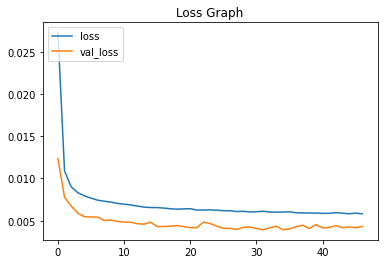

In [38]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

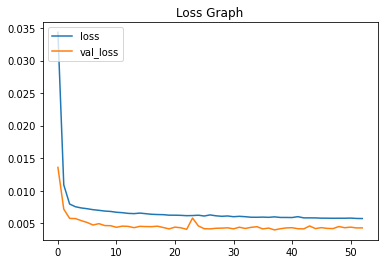

In [39]:
plt.plot(train_history2.history["loss"])
plt.plot(train_history2.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [40]:
x_val = x_val.reshape(-1,past,feature)
pre_price = regressor.predict(x_val)
pre_price = pre_price.reshape(-1,1)
pre_price = Yscaler.inverse_transform(pre_price)
y_val = Yscaler.inverse_transform(y_val)

In [41]:
x_val.shape

(454, 5, 26)

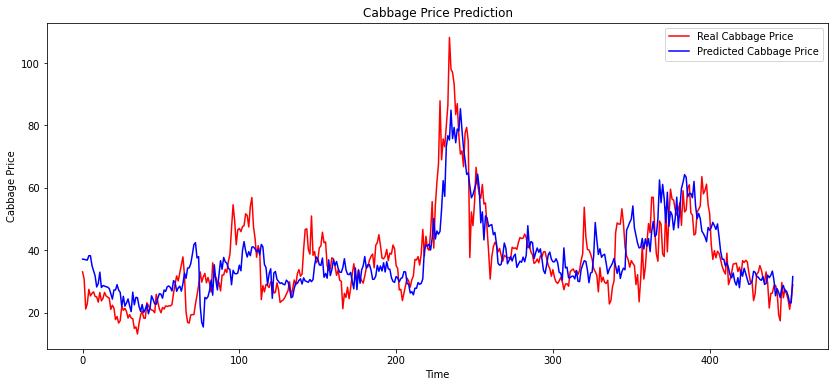

In [42]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val, color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price, color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

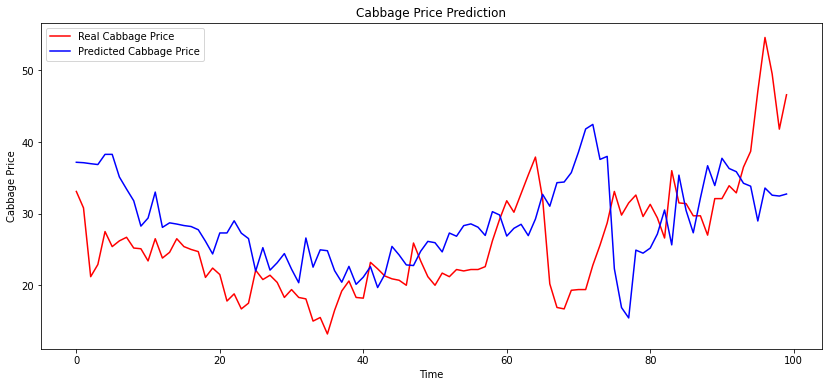

In [43]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price[0:100], color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

In [44]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_val, pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 73.82053838029265 
RMSE value : 8.59188794039428 
R2 score value : 0.6286574254707146


In [45]:
# model1
gg = Xscaler.transform(gg.reshape(-1,feature))
gg = gg.reshape(-1,past,feature)
gg_pre_price = regressor.predict(gg)
gg_pre_price = Yscaler.inverse_transform(gg_pre_price)
# model2
gg2_pre_price = regressor2.predict(gg)
gg2_pre_price = Yscaler.inverse_transform(gg2_pre_price)
# model3
gg3_pre_price = regressor3.predict(gg)
gg3_pre_price = Yscaler.inverse_transform(gg3_pre_price)
# model4
gg4_pre_price = regressor4.predict(gg)
gg4_pre_price = Yscaler.inverse_transform(gg4_pre_price)
# model5
gg5_pre_price = regressor5.predict(gg)
gg5_pre_price = Yscaler.inverse_transform(gg5_pre_price)

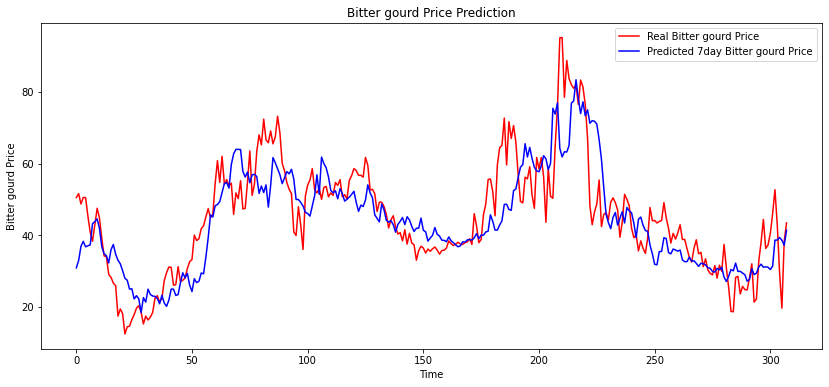

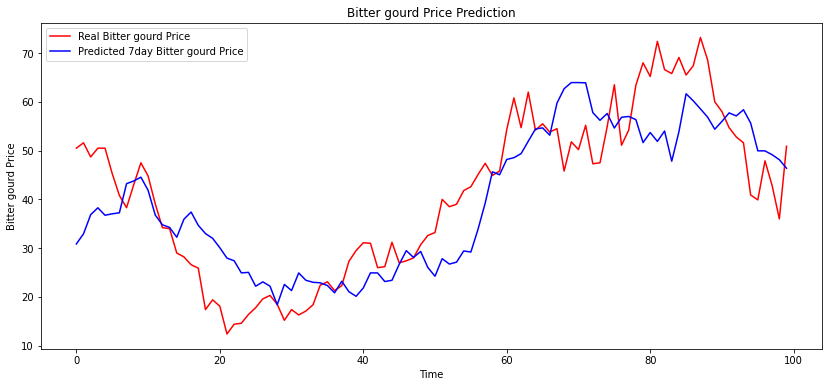

In [46]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy, color = 'red', label = f'Real {P_name} Price')
plt.plot(gg4_pre_price, color = 'blue', label = f'Predicted {day}day {P_name} Price')
plt.title(f'{P_name} Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{P_name} Price')
plt.legend()
plt.savefig(f"{P_name}-all")
plt.show()
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy[:100], color = 'red', label = f'Real {P_name} Price')
plt.plot(gg4_pre_price[:100], color = 'blue', label = f'Predicted {day}day {P_name} Price')
plt.title(f'{P_name} Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{P_name} Price')
plt.legend()
plt.savefig(f"{P_name}-recent")
plt.show()

In [47]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE1 = mean_squared_error(yy, gg_pre_price)
RMSE1 = np.sqrt(MSE1)
R2_Score_1 = r2_score(yy, gg_pre_price)
print("Model-1", f"MSE value : {MSE1}", f"\nRMSE value : {RMSE1}", f"\nR2 score value : {R2_Score_1}", "\n", "-"*35)
MSE2 = mean_squared_error(yy, gg2_pre_price)
RMSE2 = np.sqrt(MSE2)
R2_Score_2 = r2_score(yy, gg2_pre_price)
print("Model-2", f"MSE value : {MSE2}", f"\nRMSE value : {RMSE2}", f"\nR2 score value : {R2_Score_2}", "\n", "-"*35)
MSE3 = mean_squared_error(yy, gg3_pre_price)
RMSE3 = np.sqrt(MSE3)
R2_Score_3 = r2_score(yy, gg3_pre_price)
print("Model-3", f"MSE value : {MSE3}", f"\nRMSE value : {RMSE3}", f"\nR2 score value : {R2_Score_3}", "\n", "-"*35)
MSE4 = mean_squared_error(yy, gg4_pre_price)
RMSE4 = np.sqrt(MSE4)
R2_Score_4 = r2_score(yy, gg4_pre_price)
print("Model-4", f"MSE value : {MSE4}", f"\nRMSE value : {RMSE4}", f"\nR2 score value : {R2_Score_4}", "\n", "-"*35)
MSE5 = mean_squared_error(yy, gg5_pre_price)
RMSE5 = np.sqrt(MSE5)
R2_Score_5 = r2_score(yy, gg5_pre_price)
print("Model-5", f"MSE value : {MSE5}", f"\nRMSE value : {RMSE5}", f"\nR2 score value : {R2_Score_5}", "\n", "-"*35)

Model-1 MSE value : 98.06791690816794 
RMSE value : 9.902924664369003 
R2 score value : 0.5712733013020834 
 -----------------------------------
Model-2 MSE value : 94.88068168394284 
RMSE value : 9.74067152120134 
R2 score value : 0.5852070410891262 
 -----------------------------------
Model-3 MSE value : 91.3199671651142 
RMSE value : 9.556148134322438 
R2 score value : 0.6007735324432011 
 -----------------------------------
Model-4 MSE value : 84.11989519866547 
RMSE value : 9.171689876934646 
R2 score value : 0.6322503209983569 
 -----------------------------------
Model-5 MSE value : 92.21238555734233 
RMSE value : 9.602728026833955 
R2 score value : 0.5968721179620968 
 -----------------------------------


In [48]:
RMSE1 = round(RMSE1,2)
RMSE2 = round(RMSE2,2)
RMSE3 = round(RMSE3,2)
RMSE4 = round(RMSE4,2)
RMSE5 = round(RMSE5,2)
# regressor.save(f"{P_name}_P{past}F{day}_RMSE={RMSE1}.h5")
# regressor2.save(f"{P_name}_P{past}F{day}_RMSE={RMSE2}.h5")
# regressor3.save(f"{P_name}_P{past}F{day}_RMSE={RMSE3}.h5")
regressor4.save(f"{P_name}_P{past}F{day}_RMSE={RMSE4}.h5")
# regressor5.save(f"{P_name}_P{past}F{day}_RMSE={RMSE5}.h5")

In [49]:
ggall_pre_price = (gg_pre_price + gg2_pre_price + gg3_pre_price + gg4_pre_price + gg5_pre_price)/5
MSE = mean_squared_error(yy, ggall_pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(yy, ggall_pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")
regressor.save(f"{P_name}_P{past}F{day}_RMSE={RMSE}.h5")

MSE value : 89.61477126118042 
RMSE value : 9.466507870444117 
R2 score value : 0.6082281927803971


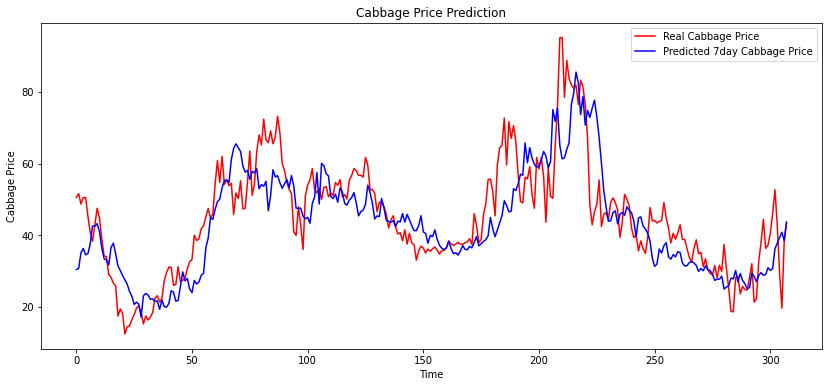

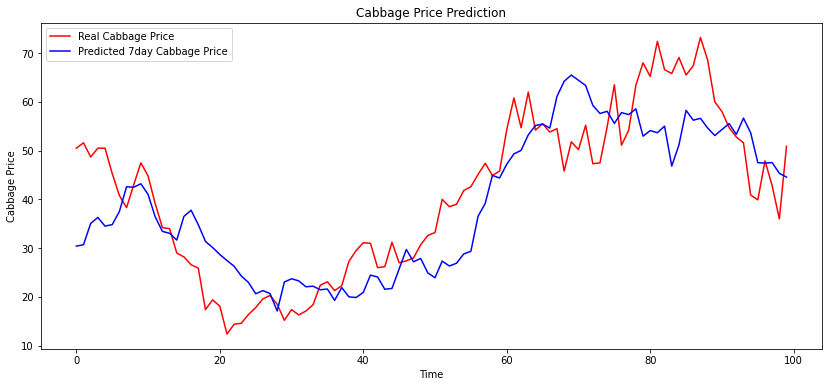

In [50]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy, color = 'red', label = 'Real Cabbage Price')
plt.plot(ggall_pre_price, color = 'blue', label = f'Predicted {day}day Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(yy[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(ggall_pre_price[0:100], color = 'blue', label = f'Predicted {day}day Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()